In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('bmi.csv')
df.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [4]:
X = df[["Height", "Weight"]]     # variables predictoras
y = df["Index"]                  # variable objetivo


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


IMPLEMENTAR EL REGRESOR LINEAL DEL PROBLEMA VISTO EN CLASE USANDO SKLEARN

In [9]:
from sklearn.linear_model import SGDRegressor
import numpy as np

epochs = 200
alpha = 0.01

sgd = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=alpha,
    max_iter=1,         # entrenaremos 1 epoch por vez
    tol=None,
    penalty=None,
    warm_start=True     # permite seguir entrenando con los mismos pesos
)


In [10]:
costos = []

for epoch in range(epochs):
    sgd.fit(X_scaled, y)   # entrena 1 epoch
    
    # calcular costo (MSE)
    y_pred = sgd.predict(X_scaled)
    mse = np.mean((y_pred - y) ** 2)
    costos.append(mse)


REPORTE LOS PESOS W, EL BIAS Y EL LOS COSTOS (DEBERIAN DISMINUIR A MEDIDA DE QUE LAS EPOCHS AUMENTA)

In [11]:
print("Pesos (W):", sgd.coef_)
print("Bias (b):", sgd.intercept_)


Pesos (W): [-0.6456327   1.07797622]
Bias (b): [3.77082596]


GRAFIQUE LOS COSTOS VS LAS EPOCHS

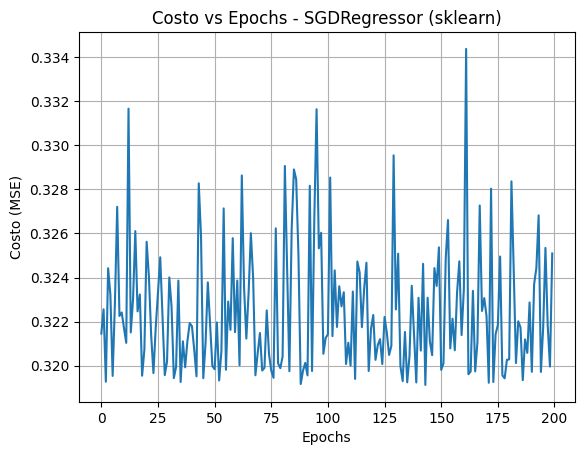

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), costos)
plt.xlabel("Epochs")
plt.ylabel("Costo (MSE)")
plt.title("Costo vs Epochs - SGDRegressor (sklearn)")
plt.grid(True)
plt.show()


PRESENTE LAS METRICAS DE REGRESION CON SU RESPECTIVA INTERPRETACION (R2, MSE, MAE...Y LAS QUE ESTAN ESPECIFICADAS EN EL NOTEBOOK)

In [14]:
y_pred = sgd.predict(X_scaled)


In [15]:
# MSE
mse = mean_squared_error(y, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y, y_pred)

# R2
r2 = r2_score(y, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


MSE : 0.32509212737426324
RMSE: 0.5701685078766305
MAE : 0.4536304560892288
R2  : 0.8225959961853869


*MSE — Mean Squared Error*

“Mide el promedio del cuadrado de los errores. Penaliza fuertemente los errores grandes.
Mientras más pequeño sea el MSE, mejor es el modelo.”

*RMSE — Root Mean Squared Error*

“Es la raíz del MSE, por lo que vuelve el error a la misma unidad que la variable objetivo.
Indica cuánto se equivoca el modelo en promedio.”

*MAE — Mean Absolute Error*

“Mide el error absoluto promedio. Penaliza de forma lineal todos los errores.
Es más robusto que el MSE ante valores atípicos.”

*R² — Coeficiente de Determinación*

“Indica qué porcentaje de la variación de la variable objetivo es explicada por el modelo.
Un R² cercano a 1 significa un modelo que explica bien los datos.
Un R² cercano a 0 significa un modelo débil.
Un R² negativo significa que el modelo es peor que una línea horizontal.”

SIMULE UNA MUESTRA NUEVA (COMO SI FUESE UN PACIENTE NUEVO) Y HAGA LA PREDICCION CON EL ALGORITMO ENTRENADO

In [13]:
nuevo = [[170, 65]]
nuevo_scaled = scaler.transform(nuevo)

prediccion = sgd.predict(nuevo_scaled)
print("Predicción:", prediccion)


Predicción: [2.40241057]


C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
